In [39]:
! pip install -q torch torchvision matplotlib
! pip install -U ipywidgets
! pip install numpy==1.26.4
! pip install urllib3==1.26.6

In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
def load_experiment_data(folder, strategy_name, experiment_name = ""):

    if experiment_name != "":
        training_result_file_name = f"{strategy_name}_{experiment_name}_results.p"
        model_result_file_name = f"{strategy_name}_model_{experiment_name}_results.p"
    else:
        training_result_file_name = f"{strategy_name}_results.p"
        model_result_file_name = f"{strategy_name}_model_results.p"


    with open(f'experiments/{folder}/results/{training_result_file_name}', 'rb') as f:
        training_results = pickle.load(f)
    
    with open(f'experiments/{folder}/results/{model_result_file_name}', 'rb') as f:
        model_results = pickle.load(f)
        
    return training_results, model_results

# Original Strategies vs FedPart Strategies

In [6]:
# Load Data

fed_avg_train_result, fed_avg_model_result = load_experiment_data("original_strategies", "fed_avg")
fed_avg_rounds = list(fed_avg_train_result.keys())

fed_prox_train_result, fed_prox_model_result = load_experiment_data("original_strategies", "fed_prox")
fed_prox_rounds = list(fed_prox_train_result.keys())

# fed_moon_train_result, fed_moon_model_result = load_experiment_data("original_strategies", "fed_moon")
# fed_moon_rounds = list(fed_moon_train_result.keys())

fed_part_avg_train_result, fed_part_avg_model_result = load_experiment_data("fedpart_strategies", "fed_part_avg")
fed_part_avg_rounds = list(fed_part_avg_train_result.keys())

# fed_part_prox_train_result, fed_part_prox_model_result = load_experiment_data("fedpart_strategies", "fed_part_prox")
# fed_part_prox_rounds = list(fed_part_prox_train_result.keys())

# fed_part_moon_train_result, fed_part_moon_model_result = load_experiment_data("fedpart_strategies", "fed_part_moon")
# fed_part_moon_rounds = list(fed_part_moon_train_result.keys())




### Communication Cost

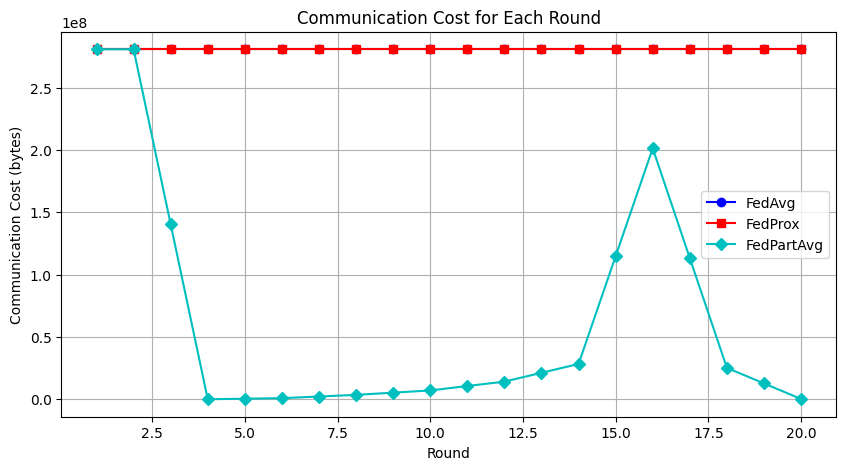

In [7]:
fed_avg_sizes = [fed_avg_train_result[round]["total_size"] for round in fed_avg_rounds]
fed_prox_sizes = [fed_prox_train_result[round]["total_size"] for round in fed_prox_rounds]
# fed_moon_sizes = [fed_moon_train_result[round]["total_size"] for round in fed_moon_rounds]
fed_part_avg_sizes = [fed_part_avg_train_result[round]["total_size"] for round in fed_part_avg_rounds]
# fed_part_prox_sizes = [fed_part_prox_train_result[round]["total_size"] for round in fed_part_prox_rounds]
# fed_part_moon_sizes = [fed_part_moon_train_result[round]["total_size"] for round in fed_part_moon_rounds]



plt.figure(figsize=(10, 5))
plt.plot(fed_avg_rounds, fed_avg_sizes, marker='o', linestyle='-', color='b', label='FedAvg')
plt.plot(fed_prox_rounds, fed_prox_sizes, marker='s', linestyle='-', color='r', label='FedProx')
# plt.plot(fed_moon_rounds, fed_moon_sizes, marker='^', linestyle='-', color='g', label='FedMoon')
plt.plot(fed_part_avg_rounds, fed_part_avg_sizes, marker='D', linestyle='-', color='c', label='FedPartAvg')
# plt.plot(fed_part_prox_rounds, fed_part_prox_sizes, marker='v', linestyle='-', color='m', label='FedPartProx')
# plt.plot(fed_part_moon_rounds, fed_part_moon_sizes, marker='*', linestyle='-', color='y', label='FedPartMoon')




plt.xlabel('Round')
plt.ylabel('Communication Cost (bytes)')
plt.title('Communication Cost for Each Round')
plt.legend()
plt.grid(True)

### Accuracy

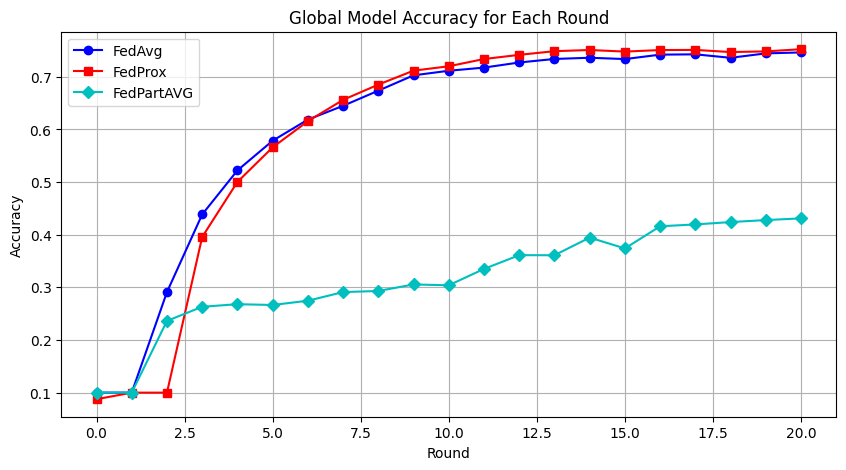

In [8]:

fed_avg_model_rounds = list(fed_avg_model_result.keys())
fed_avg_accuracies = [fed_avg_model_result[round]["global_metrics"]["accuracy"] for round in fed_avg_model_rounds]



fed_prox_model_rounds = list(fed_prox_model_result.keys())
fed_prox_accuracies = [fed_prox_model_result[round]["global_metrics"]["accuracy"] for round in fed_prox_model_rounds]

# fed_moon_model_rounds = list(fed_moon_model_result.keys())
# fed_moon_accuracies = [fed_moon_model_result[round]["global_metrics"]["accuracy"] for round in fed_moon_model_rounds]

fed_part_avg_model_rounds = list(fed_part_avg_model_result.keys())
fed_part_avg_accuracies = [fed_part_avg_model_result[round]["global_metrics"]["accuracy"] for round in fed_part_avg_model_rounds]

# fed_part_prox_model_rounds = list(fed_part_prox_model_result.keys())
# fed_part_prox_accuracies = [fed_part_prox_model_result[round]["global_metrics"]["accuracy"] for round in fed_part_prox_model_rounds]

# fed_part_moon_model_rounds = list(fed_part_moon_model_result.keys())
# fed_part_moon_accuracies = [fed_part_moon_model_result[round]["global_metrics"]["accuracy"] for round in fed_part_moon_model_rounds]



plt.figure(figsize=(10, 5))
plt.plot(fed_avg_model_rounds, fed_avg_accuracies, marker='o', linestyle='-', color='b', label='FedAvg')
plt.plot(fed_prox_model_rounds, fed_prox_accuracies, marker='s', linestyle='-', color='r', label='FedProx')
# plt.plot(fed_moon_model_rounds, fed_moon_accuracies, marker='^', linestyle='-', color='g', label='FedMoon')
plt.plot(fed_part_avg_model_rounds, fed_part_avg_accuracies, marker='D', linestyle='-', color='c', label='FedPartAVG')
# plt.plot(fed_part_prox_model_rounds, fed_part_prox_accuracies, marker='v', linestyle='-', color='m', label='FedPartProx')
# plt.plot(fed_part_moon_model_rounds, fed_part_moon_accuracies, marker='*', linestyle='-', color='y', label='FedPartMoon')


plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Global Model Accuracy for Each Round')
plt.legend()
plt.grid(True)

### Client Loss

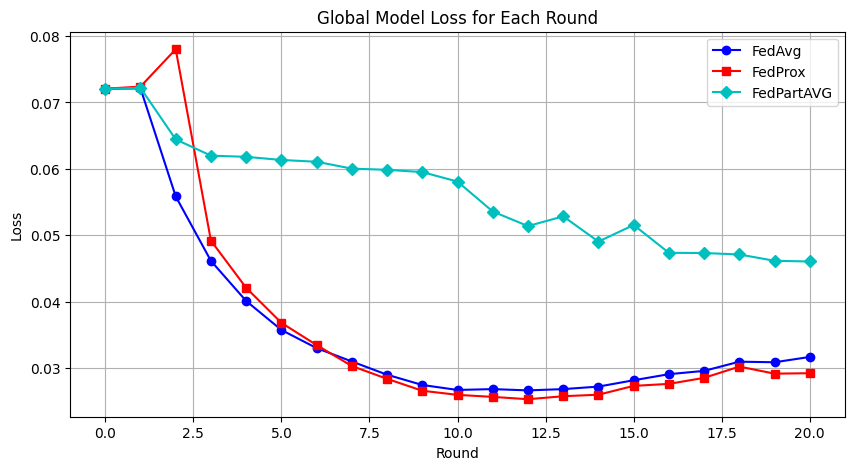

In [9]:
fed_avg_global_losses = [fed_avg_model_result[round]["global_loss"] for round in fed_avg_model_rounds]
fed_prox_global_losses = [fed_prox_model_result[round]["global_loss"] for round in fed_prox_model_rounds]
# fed_moon_global_losses = [fed_moon_model_result[round]["global_loss"] for round in fed_moon_model_rounds]
fed_part_avg_global_losses = [fed_part_avg_model_result[round]["global_loss"] for round in fed_part_avg_model_rounds]
# fed_part_prox_global_losses = [fed_part_prox_model_result[round]["global_loss"] for round in fed_part_prox_model_rounds]
# fed_part_moon_global_losses = [fed_part_moon_model_result[round]["global_loss"] for round in fed_part_moon_model_rounds]
plt.figure(figsize=(10, 5))
plt.plot(fed_avg_model_rounds, fed_avg_global_losses, marker='o', linestyle='-', color='b', label='FedAvg')
plt.plot(fed_prox_model_rounds, fed_prox_global_losses, marker='s', linestyle='-', color='r', label='FedProx')
# plt.plot(fed_moon_model_rounds, fed_moon_global_losses, marker='^', linestyle='-', color='g', label='FedMoon')
plt.plot(fed_part_avg_model_rounds, fed_part_avg_global_losses, marker='D', linestyle='-', color='c', label='FedPartAVG')
# plt.plot(fed_part_prox_model_rounds, fed_part_prox_global_losses, marker='v', linestyle='-', color='m', label='FedPartProx')
# plt.plot(fed_part_moon_model_rounds, fed_part_moon_global_losses, marker='*', linestyle='-', color='y', label='FedPartMoon')

plt.xlabel('Round')
plt.ylabel('Loss')
plt.title('Global Model Loss for Each Round')
plt.legend()
plt.grid(True)

# FedMomentum vs FedPart vs Original Strategies

## FedAvg vs FedPartAVG vs FPAM

In [20]:
fpam_train_result, fpam_model_result = load_experiment_data("fedmom_strategies/fedavgmom", "fpam")
fpam_rounds = list(fpam_train_result.keys())


weighted_fpam_train_result, weighted_fpam_model_result = load_experiment_data("fedmom_strategies/fedavgmom", "weighted_fpam")
weighted_fpam_rounds = list(weighted_fpam_train_result.keys())


#### Communication Cost

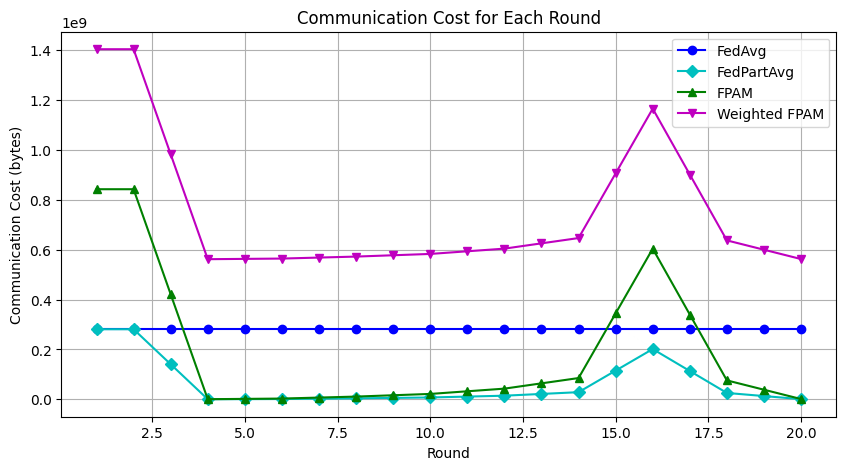

In [22]:
fpam_sizes = [fpam_train_result[round]["total_size"] *3 for round in fpam_rounds]
weighted_fpam_sizes = [weighted_fpam_train_result[round]["total_size"] * 3 for round in weighted_fpam_rounds]

plt.figure(figsize=(10, 5))
plt.plot(fed_avg_rounds, fed_avg_sizes, marker='o', linestyle='-', color='b', label='FedAvg')
plt.plot(fed_part_avg_rounds, fed_part_avg_sizes, marker='D', linestyle='-', color='c', label='FedPartAvg')
plt.plot(fpam_rounds, fpam_sizes, marker='^', linestyle='-', color='g', label='FPAM')
plt.plot(weighted_fpam_rounds, weighted_fpam_sizes, marker='v', linestyle='-', color='m', label='Weighted FPAM')


plt.xlabel('Round')
plt.ylabel('Communication Cost (bytes)')
plt.title('Communication Cost for Each Round')
plt.legend()
plt.grid(True)

#### Accuracy

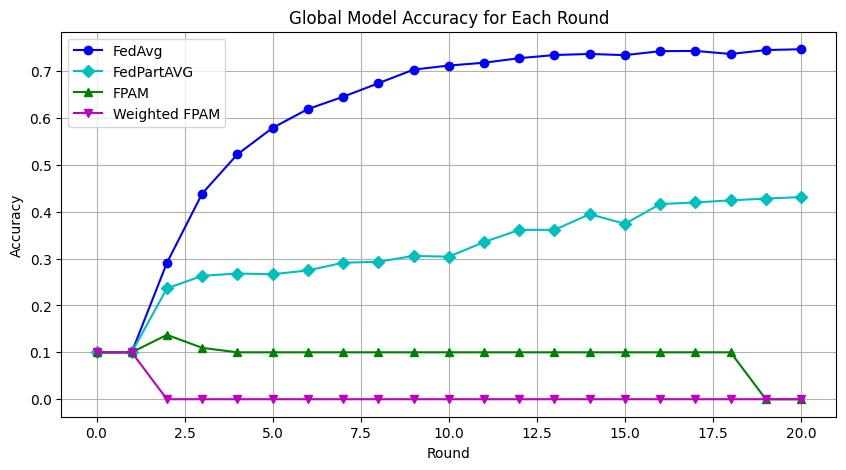

In [23]:
fpam_model_rounds = list(fpam_model_result.keys())
fpam_accuracies = [fpam_model_result[round]["global_metrics"]["accuracy"] for round in fpam_model_rounds]

weighted_fpam_model_rounds = list(weighted_fpam_model_result.keys())
weighted_fpam_accuracies = [weighted_fpam_model_result[round]["global_metrics"]["accuracy"] for round in weighted_fpam_model_rounds]

plt.figure(figsize=(10, 5))
plt.plot(fed_avg_model_rounds, fed_avg_accuracies, marker='o', linestyle='-', color='b', label='FedAvg')
plt.plot(fed_part_avg_model_rounds, fed_part_avg_accuracies, marker='D', linestyle='-', color='c', label='FedPartAVG')
plt.plot(fpam_model_rounds, fpam_accuracies, marker='^', linestyle='-', color='g', label='FPAM')
plt.plot(weighted_fpam_model_rounds, weighted_fpam_accuracies, marker='v', linestyle='-', color='m', label='Weighted FPAM')

plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Global Model Accuracy for Each Round')
plt.legend()
plt.grid(True)

#### Client Loss

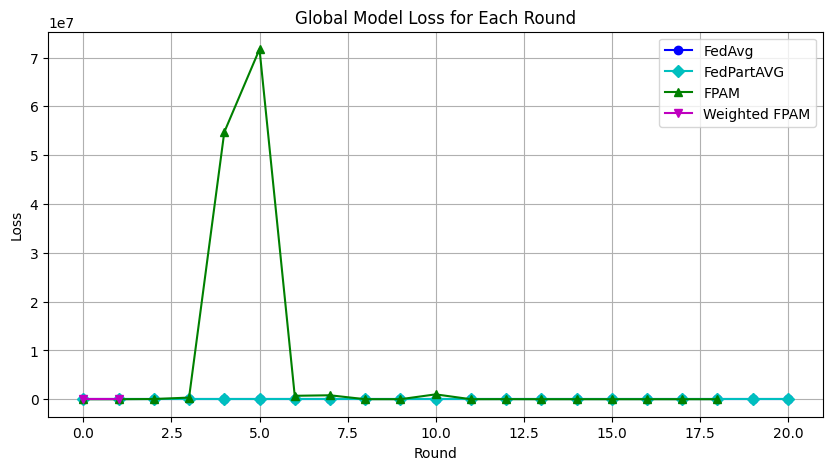

In [24]:
fed_avg_global_losses = [fed_avg_model_result[round]["global_loss"] for round in fed_avg_model_rounds]
fed_part_avg_global_losses = [fed_part_avg_model_result[round]["global_loss"] for round in fed_part_avg_model_rounds]
fpam_global_losses = [fpam_model_result[round]["global_loss"] for round in fpam_model_rounds]
weighted_fpam_global_losses = [weighted_fpam_model_result[round]["global_loss"] for round in weighted_fpam_model_rounds]


plt.figure(figsize=(10, 5))
plt.plot(fed_avg_model_rounds, fed_avg_global_losses, marker='o', linestyle='-', color='b', label='FedAvg')
plt.plot(fed_part_avg_model_rounds, fed_part_avg_global_losses, marker='D', linestyle='-', color='c', label='FedPartAVG')
plt.plot(fpam_model_rounds, fpam_global_losses, marker='^', linestyle='-', color='g', label='FPAM')
plt.plot(weighted_fpam_model_rounds, weighted_fpam_global_losses, marker='v', linestyle='-', color='m', label='Weighted FPAM')


plt.xlabel('Round')
plt.ylabel('Loss')
plt.title('Global Model Loss for Each Round')
plt.legend()
plt.grid(True)

## FedProx vs FedPartProx vs FPPM

In [ ]:
fppm_train_result, fppm_model_result = load_experiment_data("fedmom_strategies/fedproxmom", "fppm_results")
fppm_rounds = list(fppm_train_result.keys())


weighted_fppm_train_result, weighted_fppm_model_result = load_experiment_data("fedmom_strategies/fedproxmom", "weighted_fppm_results")
weighted_fppm_rounds = list(weighted_fppm_model_result.keys())


#### Communication Cost

In [ ]:
fppm_sizes = [fppm_train_result[round]["communication_cost"] *3 for round in fppm_rounds]
weighted_fppm_sizes = [weighted_fppm_train_result[round]["communication_cost"] * 3 for round in weighted_fppm_rounds]


plt.figure(figsize=(10, 5))
plt.plot(fed_prox_rounds, fed_prox_sizes, marker='o', linestyle='-', color='b', label='FedProx')
plt.plot(fed_part_prox_rounds, fed_part_prox_sizes, marker='D', linestyle='-', color='c', label='FedPartProx')
plt.plot(fppm_rounds, fppm_sizes, marker='^', linestyle='-', color='g', label='FPPM')
plt.plot(weighted_fppm_rounds, weighted_fppm_sizes, marker='v', linestyle='-', color='m', label='Weighted FPPM')


plt.xlabel('Round')
plt.ylabel('Communication Cost (bytes)')
plt.title('Communication Cost for Each Round')
plt.legend()
plt.grid(True)

#### Accuracy

In [ ]:
fppm_model_rounds = list(fppm_model_result.keys())
fppm_accuracies = [fppm_model_result[round]["global_metrics"]["accuracy"] for round in fppm_model_rounds]

weighted_fppm_model_rounds = list(weighted_fppm_model_result.keys())
weighted_fppm_accuracies = [weighted_fppm_model_result[round]["global_metrics"]["accuracy"] for round in weighted_fppm_model_rounds]

plt.figure(figsize=(10, 5))
plt.plot(fed_prox_model_rounds, fed_prox_accuracies, marker='o', linestyle='-', color='b', label='FedProx')
plt.plot(fed_part_prox_model_rounds, fed_part_prox_accuracies, marker='D', linestyle='-', color='c', label='FedPartProx')
plt.plot(fppm_model_rounds, fppm_accuracies, marker='^', linestyle='-', color='g', label='FPPM')
plt.plot(weighted_fppm_model_rounds, weighted_fppm_accuracies, marker='v', linestyle='-', color='m', label='Weighted FPPM')

plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Global Model Accuracy for Each Round')
plt.legend()
plt.grid(True)

#### Client Loss

In [ ]:
fed_prox_global_losses = [fed_prox_model_result[round]["global_loss"] for round in fed_prox_model_rounds]
fed_part_prox_global_losses = [fed_part_prox_model_result[round]["global_loss"] for round in fed_part_prox_model_rounds]
fppm_global_losses = [fppm_model_result[round]["global_loss"] for round in fppm_model_rounds]
weighted_fppm_global_losses = [weighted_fppm_model_result[round]["global_loss"] for round in weighted_fppm_model_rounds]


plt.figure(figsize=(10, 5))
plt.plot(fed_prox_model_rounds, fed_prox_global_losses, marker='o', linestyle='-', color='b', label='FedProx')
plt.plot(fed_part_prox_model_rounds, fed_part_prox_global_losses, marker='D', linestyle='-', color='c', label='FedPartProx')
plt.plot(fppm_model_rounds, fppm_global_losses, marker='^', linestyle='-', color='g', label='FPPM')
plt.plot(weighted_fppm_model_rounds, weighted_fppm_global_losses, marker='v', linestyle='-', color='m', label='Weighted FPPM')


plt.xlabel('Round')
plt.ylabel('Loss')
plt.title('Global Model Loss for Each Round')
plt.legend()
plt.grid(True)

## FedMoon vs FedPartMoon vs FPMM

In [ ]:
fpmm_train_result, fpmm_model_result = load_experiment_data("fedmom_strategies/fedmoonmom", "fpmm_results")
fpmm_rounds = list(fpmm_train_result.keys())


weighted_fpmm_train_result, weighted_fpmm_model_result = load_experiment_data("fedmom_strategies/fedmoonmom", "weighted_fpmm_results")
weighted_fpmm_rounds = list(weighted_fpmm_model_result.keys())


#### Communication Cost

In [ ]:
fpmm_sizes = [fpmm_train_result[round]["communication_cost"] *3 for round in fpmm_rounds]
weighted_fpmm_sizes = [weighted_fpmm_train_result[round]["communication_cost"] * 3 for round in weighted_fpmm_rounds]


plt.figure(figsize=(10, 5))
plt.plot(fed_moon_rounds, fed_moon_sizes, marker='o', linestyle='-', color='b', label='FedMoon')
plt.plot(fed_part_moon_rounds, fed_part_moon_sizes, marker='D', linestyle='-', color='c', label='FedPartMoon')
plt.plot(fpmm_rounds, fpmm_sizes, marker='^', linestyle='-', color='g', label='FPMM')
plt.plot(weighted_fpmm_rounds, weighted_fpmm_sizes, marker='v', linestyle='-', color='m', label='Weighted FPMM')


plt.xlabel('Round')
plt.ylabel('Communication Cost (bytes)')
plt.title('Communication Cost for Each Round')
plt.legend()
plt.grid(True)

#### Accuracy

In [ ]:
fpmm_model_rounds = list(fpmm_model_result.keys())
fpmm_accuracies = [fpmm_model_result[round]["global_metrics"]["accuracy"] for round in fpmm_model_rounds]

weighted_fpmm_model_rounds = list(weighted_fpmm_model_result.keys())
weighted_fpmm_accuracies = [weighted_fpmm_model_result[round]["global_metrics"]["accuracy"] for round in weighted_fpmm_model_rounds]

plt.figure(figsize=(10, 5))
plt.plot(fed_moon_model_rounds, fed_moon_accuracies, marker='o', linestyle='-', color='b', label='FedMoon')
plt.plot(fed_part_moon_model_rounds, fed_part_moon_accuracies, marker='D', linestyle='-', color='c', label='FedPartMoon')
plt.plot(fpmm_model_rounds, fpmm_accuracies, marker='^', linestyle='-', color='g', label='FPMM')
plt.plot(weighted_fpmm_model_rounds, weighted_fpmm_accuracies, marker='v', linestyle='-', color='m', label='Weighted FPMM')

plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Global Model Accuracy for Each Round')
plt.legend()
plt.grid(True)

#### Client Loss

In [ ]:
fed_moon_global_losses = [fed_moon_model_result[round]["global_loss"] for round in fed_moon_model_rounds]
fed_part_moon_global_losses = [fed_part_moon_model_result[round]["global_loss"] for round in fed_part_moon_model_rounds]
fpmm_global_losses = [fpmm_model_result[round]["global_loss"] for round in fpmm_model_rounds]
weighted_fpmm_global_losses = [weighted_fpmm_model_result[round]["global_loss"] for round in weighted_fpmm_model_rounds]


plt.figure(figsize=(10, 5))
plt.plot(fed_moon_model_rounds, fed_moon_global_losses, marker='o', linestyle='-', color='b', label='FedMoon')
plt.plot(fed_part_moon_model_rounds, fed_part_moon_global_losses, marker='D', linestyle='-', color='c', label='FedPartMoon')
plt.plot(fpmm_model_rounds, fpmm_global_losses, marker='^', linestyle='-', color='g', label='FPMM')
plt.plot(weighted_fpmm_model_rounds, weighted_fpmm_global_losses, marker='v', linestyle='-', color='m', label='Weighted FPMM')


plt.xlabel('Round')
plt.ylabel('Loss')
plt.title('Global Model Loss for Each Round')
plt.legend()
plt.grid(True)